# Работа с данными

## О распределении в целом

Вообще говоря, экспоненциальное распределение очень связано с распределением Пуассона. Поэтому, выбирая данные, нужно обратить внимание на то, является ли изучаемый процесс пуассоновским. Что значит пуассоновский процесс? Пуассоновский процесс это такая модель, при которой:
- последовательность случайных событий происходит с какой-то постоянной интенсивностью
- все события являются независимыми

В "Домашней работе 1" я объяснял связь между распределением Пуассона и показательным распределением, но можно проиллюстрировать ее и здесь. По своему смыслу экспоненциальная модель это распределение вероятностей времени между возникновениями каких-то событий в пауссоновском процессе. То есть оно отвечает на вопрос, с какой вероятностью данное событие произойдет в какой-то отрезок времени. Пойдем от обратного и зададимся таким вопросом, а в течении какого времени событие **не** произойдет? На сколько нам известно, отсутствие какого-то события это Пуассоновская модель при $\xi=0$, то есть если $P(\xi=k)=\frac{\lambda^k e^{-\lambda}}{k!}$, то $P(\xi=0)=\frac{\lambda^0 e^{-\lambda}}{0!}=e^{-\lambda}$. Это значение верно только для одного временного юнита. Если мы хотим узнать вероятность *P(ничего не происходит в течении времени t)*, то нам нужно сделать следующее:

$$P(\mbox{ничего не происходит в течении t})=P(\mbox{ничего не происходит за 1-й юнит})\cdot P(\mbox{ничего не происходит за 2-й юнит})\cdot \dots \cdot P(\mbox{ничего не происходит за t-й юнит})=e^{-\lambda}\cdot e^{-\lambda} \cdot \dots \cdot e^{-\lambda}=e^{-\lambda t}$$

Таким образом мы получили $P(T > t)$, где $T$ - случайная величина, а сама вероятность по смыслу - вероятность того, что время ожидания возникновения события будет больше $t$. А нас интересует как раз-таки обратное, то есть $P(T \leq t)=1-e^{-\lambda t}$. Вот мы и получили CDF нашего показательного распределения, чтобы получить PDF нам нужно продифференцировать CDF: $\frac{d}{dt}(1-e^{-\lambda t})=\lambda e^{-\lambda t}$

Также стоит отметить, что $\lambda_{poiss}$ связана с $\lambda_{exp}$. По смыслу $\lambda_{poiss}$ является интенсивностью. Грубо говоря, за определенный отрезок времени какое-то событие в среднем происходит $\lambda_{poiss}$ раз. $\lambda_{exp}$ напротив, отвечает на вопрос, за какое время произойдет одно событие. То есть $\lambda_{exp}=\frac{1}{\lambda_{poiss}}$

Подытожим, экспоненциальное распределение говорит нам о вероятности возникновения какого-то события в неком промежутке времени. Для работы нам нужно правильно выбрать данные, они должны быть из пауссоновского процесса, то есть события должны быть независимы друг от друга и происходить с некой интенсивностью.

## О данных которые будем исследовать

Когда речь идет о процессах, которые происходят с некой интенсивностью, на ум сразу приходят отрасли, в которых процесс поставлен на "поток". Будь-то промышленность, транспорт, вычислительная техника(серверы), отели, кафе и так далее. Для своей работы я решил взять довольно крупный датасет о трафике различных аэропортов в Америке. Данные были взяты [из этого источника](https://www.kaggle.com/giovamata/airlinedelaycauses). В датасете есть информация о времени и датах вылетов самолетов из различных аэропортов. За процесс возьмем вылеты самолетов из какого-то аэропорта. Очевидно, что у данного процесса будет некая интенсивность. Зададимся вопросом, если мы наблюдаем за вылетом самолетов, и только что взлетел самолет "A", какова вероятность, что следующий самолет "B" вылетит в промежуток времени t. Для того чтобы ответить на этот вопрос, нам надо взять выборку и посмотреть, как она будет распределена. Имея данные о времени взлета, мы можем расположить их в порядке возрастания и взять разницу между каждыми двумя взлетами самолетов и посмотреть как будет распределена эта разница. Код python ниже помогает сгенерировать массив разницы времени между двумя взлетами (delta) для трех аэропортов (*Los Angeles International Airport, McCarran International Airport, Miami International Airport*). После получение массива delta, код генерирует график распределения вместе с теоретическими графиками, полученными с помощью оценки неизвестного параметра.

Airport is LAX
100 values of delta:  [0, 1.0, 0.0, 34.0, 15.0, 26.0, 22.0, 19.0, 254.0, 9.0, 11.0, 19.0, 1.0, 30.0, 12.0, 8.0, 16.0, 1.0, 1.0, 10.0, 6.0, 5.0, 3.0, 4.0, 17.0, 28.0, 16.0, 3.0, 12.0, 4.0, 4.0, 0.0, 2.0, 3.0, 0.0, 1.0, 7.0, 2.0, 0.0, 2.0, 8.0, 1.0, 0.0, 15.0, 1.0, 4.0, 5.0, 4.0, 2.0, 7.0, 3.0, 0.0, 7.0, 2.0, 4.0, 4.0, 17.0, 8.0, 1.0, 2.0, 0.0, 5.0, 4.0, 1.0, 1.0, 5.0, 4.0, 2.0, 0.0, 6.0, 0.0, 23.0, 3.0, 3.0, 1.0, 0.0, 0.0, 1.0, 2.0, 2.0, 1.0, 0.0, 5.0, 4.0, 13.0, 1.0, 1.0, 0.0, 4.0, 10.0, 2.0, 0.0, 1.0, 4.0, 3.0, 2.0, 10.0, 2.0, 1.0, 8.0]


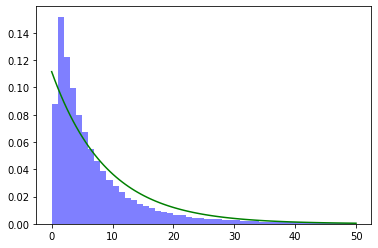

Airport is LAS
100 values of delta:  [0, 3.0, 1.0, 0.0, 1.0, 4.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 4.0, 0.0, 5.0, 8.0, 4.0, 2.0, 10.0, 24.0, 115.0, 167.0, 16.0, 92.0, 5.0, 25.0, 11.0, 11.0, 20.0, 11.0, 17.0, 5.0, 12.0, 7.0, 13.0, 5.0, 3.0, 8.0, 11.0, 3.0, 5.0, 13.0, 10.0, 9.0, 7.0, 7.0, 3.0, 9.0, 6.0, 2.0, 1.0, 6.0, 1.0, 1.0, 8.0, 3.0, 14.0, 33.0, 3.0, 4.0, 2.0, 2.0, 17.0, 7.0, 1.0, 0.0, 4.0, 3.0, 34.0, 12.0, 0.0, 11.0, 15.0, 3.0, 9.0, 0.0, 2.0, 2.0, 4.0, 4.0, 0.0, 3.0, 9.0, 7.0, 1.0, 0.0, 8.0, 1.0, 3.0, 7.0, 1.0, 4.0, 2.0, 5.0, 2.0, 5.0, 11.0, 4.0]


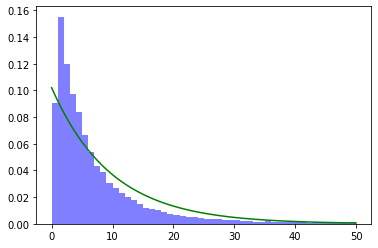

Airport is MIA
100 values of delta:  [0, 402.0, 4.0, 37.0, 49.0, 1.0, 61.0, 30.0, 25.0, 2.0, 10.0, 6.0, 39.0, 22.0, 16.0, 30.0, 1.0, 13.0, 8.0, 12.0, 6.0, 11.0, 13.0, 19.0, 29.0, 4.0, 11.0, 12.0, 1.0, 3.0, 8.0, 7.0, 1.0, 11.0, 6.0, 14.0, 4.0, 0.0, 31.0, 13.0, 29.0, 4.0, 4.0, 12.0, 1.0, 8.0, 17.0, 24.0, 9.0, 40.0, 10.0, 20.0, 5.0, 18.0, 7.0, 10.0, 22.0, 1.0, 1.0, 12.0, 6.0, 9.0, 8.0, 26.0, 2.0, 5.0, 2.0, 8.0, 4.0, 15.0, 0.0, 6.0, 21.0, 1.0, 12.0, 13.0, 0.0, 5.0, 49.0, 10.0, 34.0, 0.0, 368.0, 1.0, 6.0, 22.0, 24.0, 17.0, 24.0, 17.0, 58.0, 4.0, 13.0, 18.0, 1.0, 37.0, 7.0, 14.0, 21.0, 6.0]


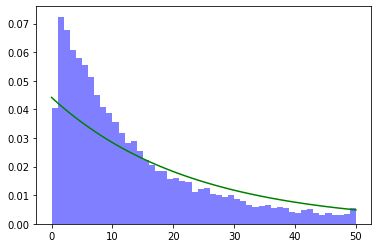

In [1]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

def distrib(airport, lamb):
    airport = airport
    with open('DelayedFlights.csv') as f:
        csv_reader = csv.DictReader(f, delimiter=',')
        clean_l = []
        # clear unnecessary data
        for row in csv_reader:
            clean_l.append([row["Year"],
                            row["Month"],
                            row["DayofMonth"],
                            int(float(row["DepTime"])),
                            row["Origin"]])

    # getting information for specific airport
    clean_l = [l[:4] for l in clean_l if l[4]==airport]

    # changing format of date and time and appending it as datetime object
    for i in range(len(clean_l)):
        sublist = clean_l[i]
        time = '%04d' % sublist[3]
        if time == '2400': time = '0000'
        clean_l[i] = datetime(int(sublist[0]), int(sublist[1]), int(sublist[2]), int(time[:2]), int(time[2:]))

    clean_l.sort()

    # creating a delta-time list
    delta = []
    for i in range(1, len(clean_l)):
        delta.append((clean_l[i]-clean_l[i-1]).total_seconds()//60)
    delta.insert(0, clean_l[0].minute//60)
    #delta = list(filter(lambda x: x > 1, delta))
    #making a graph and printing results
    print("Airport is", airport)
    print("100 values of delta: ", delta[:100])
    num_bins = 50
    n, bins, patches = plt.hist(delta, num_bins, facecolor='blue', alpha=0.5, range=[0,50], density=True)
    x = np.linspace(0,50,100)
    plt.plot(x, y:=(1/lamb)*np.exp((-1/lamb)*x),'g')
    plt.show()
    return delta

delta1 = distrib("LAX", 8.967110188525147)
delta2 = distrib("LAS", 9.810817352448334)
delta3 = distrib("MIA", 22.64314871310102)

## Исследование данных

Очевидно, что данные выборки подчиняются экспоненциальному распределению, хотя есть и необычные моменты. В данном датасете очень много самолетов, которые вылетают в промежутке $[1,5]$, поэтому на графике мы можем наблюдать отклонение от теоретических значений. Также гистограмма немного "приседает" в области $[10,30]$. Можем провести некоторое исследование.

### Выборочное среднее

Выборочное среднее вычисляется по формуле: $\overline X=\frac{1}{n}\sum_1^n X_i$. Вычислим его для наших выборок.

In [2]:
def sample_mean(delta):
    sum = 0
    for i in delta:
        sum += i
    return(sum/len(delta))

print("LAX sample mean =", sample_mean(delta1))
print("LAS sample mean =", sample_mean(delta2))
print("MIA sample mean =", sample_mean(delta3))

LAX sample mean = 8.967110188525147
LAS sample mean = 9.810817352448334
MIA sample mean = 22.64314871310102


### Выборочная дисперсия

Выборочная дисперсия вычисляется по формуле $S^2=\frac{1}{n}\sum_1^n (X_i-\overline X)^2$. Вычислим для наших выборок.

In [3]:
def sample_disp(delta):
    mean = sample_mean(delta)
    sum = 0
    for i in delta:
        sum += (i-mean)**2
    return(sum/len(delta))

print("LAX sample disp =", sample_disp(delta1))
print("LAS sample disp =", sample_disp(delta2))
print("MIA sample disp =", sample_disp(delta3))

LAX sample disp = 648.8583581296914
LAS sample disp = 885.2294305551328
MIA sample disp = 3299.644280928866


### Оценка

Из прошлой домашней работы нам известно, что для показательного распределения можно получить оценку методом максимального правдоподобия. Для параметрической функции $\tau(\theta)=\frac{1}{\theta}$, оценка будет выглядеть так: $\hat{\theta}=\overline X$, зная это, получим $\theta$ из нашей выборки:

In [4]:
print("Theta for LAX is", 1/sample_mean(delta1))
print("Theta for LAS is",1/sample_mean(delta2))
print("Theta for MIA is",1/sample_mean(delta3))

Theta for LAX is 0.11151864747682705
Theta for LAS is 0.10192830669204594
Theta for MIA is 0.04416346916546167


## Проверка гипотез

Хорошо было бы убедиться с помощью некоторых критериев в том, что наши выборки действительно имеют показательное распределение. В этом нам поможет критерий Хи-квадрат Пирсона, а именно версия для сложной гипотезы, так как нам не известен параметр $\theta$. Итак, применим его к нашим выборкам. Для начала нужно с помощью правила Стёрджеса узнать, на сколько отрезков нам лучше поделить интервал для поиска частот:

0.14297043559391218


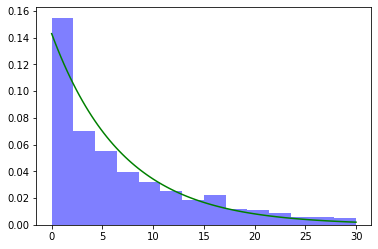

12259
14
0.0 29.001
2.0715


In [5]:
# cutting 
research_sample = list(filter(lambda x: (x>=10) & (x<40), delta1))
for i in range(len(research_sample)):
    research_sample[i] -= 10
# omp
sum = 0
for element in research_sample:
    sum += element
lamb = len(research_sample)/sum
print (lamb)
k, bins, patches = plt.hist(research_sample, 14, facecolor='blue', alpha=0.5, range=[0,30], density=True)
x = np.linspace(0,30,100)
plt.plot(x, y:=(lamb)*np.exp((-lamb)*x),'g')
plt.show()

print(len(research_sample))
# determing length of intervals
n = int(np.log2(len(research_sample)))+1
print(n)
X_1 = min(research_sample) 
X_n = max(research_sample) + 0.001
print(X_1,X_n)
d = (X_n - X_1)/n
print(d)


Составим вектор частот

In [6]:
# составим вектор частот

research_sample = sorted(research_sample)
interval_l = [i*d for i in range(1,15)]

freq_l = []

left_value = 0
for right_value in interval_l:
    count = 0
    for element in research_sample:
        if left_value <= element < right_value: 
            count += 1
    freq_l.append(count)
    left_value = right_value

print("nu is:", freq_l)
sum = 0
for i in freq_l:
    sum += i

print("sum nu is equal:", sum)

nu is: [4069, 1851, 1448, 1036, 835, 663, 495, 403, 348, 314, 246, 190, 146, 215]
sum nu is equal: 12259


Составим вектор вероятностей

In [7]:
# состовляем вектор вероятностей

th_prob_init = [1-np.exp(-0.14297043559391218*x) for x in interval_l]
th_prob = []

prev = 0
for index in range(len(th_prob_init)):
    th_prob.append(th_prob_init[index] - prev)
    prev = th_prob_init[index]

print("probability list:", th_prob)

probability list: [0.25633399081995334, 0.1906268759702694, 0.14176272809527002, 0.1054241222530854, 0.07840033626726162, 0.05830366519024788, 0.04335845401260141, 0.03224420845976783, 0.023978921824445054, 0.017832309097625343, 0.01326128214109612, 0.009861964766479492, 0.007334007980562052, 0.005454052446199231]


Посчитаем наш критерий

In [8]:
# считаем значение статистики Хи квадрат

sum = 0
for i in range(14):
    sum += (freq_l[i]-len(research_sample)*th_prob[i])**2/(len(research_sample)*th_prob[i])
print ("Chi squared equals:", sum)

Chi squared equals: 993.5150222747573


$\implies$ я подобрал не лучшие данные, хоть график ЭФР и выглядит похожим на показательное распределение, критерий говорит нам, что данные гипотезе противоречат, ну ничего, бывает, все-таки это реальные данные, а не смоделированные случайные величины.